# Analyzing Web Logs
Using Time Series Analysis to Determine 
- Anomalies in User Curriculumn Access
- General Trends in User Curriculumn Access

### Table of Contents
- [Which lesson appears to attract the most traffic consistently across cohorts (per program)?](#first-bullet)
- [Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?](#second-bullet)
- [Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?](#third-bullet)
- [Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?](#fourth-bullet)
- [At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?](#fifth-bullet)
- [What topics are grads continuing to reference after graduation and into their jobs (for each program)?](#sixth-bullet)
- [Which lessons are least accessed?](#seventh-bullet)

### Reference for Cohort Id's
| cohort_id | name       | start_date | end_date   | program_id |
|-----------|------------|------------|------------|------------|
| 1         | Arches     | 2014-02-04 | 2014-04-22 | 1          |
| 2         | Badlands   | 2014-06-04 | 2014-08-22 | 1          |
| 3         | Carlsbad   | 2014-09-04 | 2014-11-05 | 1          |
| 4         | Denali     | 2014-10-20 | 2015-01-18 | 1          |
| 5         | Everglades | 2014-11-18 | 2015-02-24 | 1          |
| 6         | Franklin   | 2015-02-03 | 2015-05-26 | 1          |
| 7         | Glacier    | 2015-06-05 | 2015-10-06 | 1          |
| 8         | Hampton    | 2015-09-22 | 2016-02-06 | 1          |
| 9         | Apollo     | 2015-03-30 | 2015-07-29 | 4          |
| 10        | Balboa     | 2015-11-03 | 2016-03-11 | 4          |
| 11        | Ike        | 2016-01-20 | 2016-05-12 | 1          |
| 12        | Joshua     | 2016-03-08 | 2016-06-30 | 1          |
| 13        | Kings      | 2016-05-23 | 2016-09-15 | 1          |
| 14        | Lassen     | 2016-07-18 | 2016-11-10 | 1          |
| 15        | Mammoth    | 2016-09-26 | 2017-02-02 | 2          |
| 16        | Niagara    | 2016-10-26 | 2017-03-09 | 2          |
| 17        | Olympic    | 2017-02-06 | 2017-05-25 | 1          |
| 18        | Pinnacles  | 2017-03-27 | 2017-07-20 | 2          |
| 19        | Quincy     | 2017-06-05 | 2017-09-22 | 1          |
| 20        | Redwood    | 2017-07-31 | 2017-12-06 | 2          |
| 21        | Sequoia    | 2017-09-27 | 2018-02-15 | 2          |
| 22        | Teddy      | 2018-01-08 | 2018-05-17 | 2          |
| 23        | Ulysses    | 2018-03-05 | 2018-07-19 | 2          |
| 24        | Voyageurs  | 2018-05-29 | 2018-10-11 | 2          |
| 25        | Wrangell   | 2018-07-23 | 2018-11-29 | 2          |
| 26        | Xanadu     | 2018-09-17 | 2019-02-08 | 2          |
| 27        | Yosemite   | 2018-11-05 | 2019-04-03 | 2          |
| 28        | Staff      | 2014-02-04 | 2014-02-04 | 2          |
| 29        | Zion       | 2019-01-22 | 2019-06-04 | 2          |
| 30        | Ada        | 2019-02-04 | 2019-06-16 | 3          |
| 31        | Andromeda  | 2019-03-18 | 2019-07-30 | 2          |
| 32        | Betelgeuse | 2019-05-28 | 2019-10-08 | 2          |
| 33        | Ceres      | 2019-07-15 | 2019-12-11 | 2          |
| 34        | Bayes      | 2019-08-19 | 2020-01-30 | 3          |
| 51        | Deimos     | 2019-09-16 | 2020-02-27 | 2          |
| 52        | Europa     | 2019-11-04 | 2020-04-17 | 2          |
| 53        | Fortuna    | 2020-01-13 | 2020-06-23 | 2          |
| 55        | Curie      | 2020-02-03 | 2020-07-07 | 3          |
| 56        | Apex       | 2020-02-24 | 2020-07-29 | 2          |
| 57        | Ganymede   | 2020-03-23 | 2020-08-20 | 2          |
| 58        | Hyperion   | 2020-05-26 | 2020-11-10 | 2          |
| 59        | Darden     | 2020-07-13 | 2021-01-12 | 3          |
| 60        | Io         | 2020-07-20 | 2021-01-21 | 2          |
| 61        | Bash       | 2020-07-20 | 2021-01-21 | 2          |
| 62        | Jupiter    | 2020-09-21 | 2021-03-30 | 2          |
| 132       | Kalypso    | 2020-11-02 | 2021-05-04 | 2          |

# Data Acquired with Wrangle.py Module
- will need the txt file downloaded in working directory
    - anonymized-curriculum-access.txt
- reads txt file, renames columns, sets date to index, and returns the cleaned df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import Wrangle

In [2]:
df = Wrangle.acquire_logs()

In [3]:
df

,page_viewed,user_id,cohort_id,ip
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2020-11-02 16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175


In [16]:
# creating a dataframe of only Data Science Cohorts, any cohort with program id of 3
DS_df = df[(df.cohort_id == 30) | (df.cohort_id == 34) | (df.cohort_id == 55) | (df.cohort_id == 59)]

In [18]:
DS_df

,page_viewed,user_id,cohort_id,ip
2019-08-20 09:39:58,/,466,34.0,97.105.19.58
2019-08-20 09:39:59,/,467,34.0,97.105.19.58
2019-08-20 09:39:59,/,468,34.0,97.105.19.58
2019-08-20 09:40:02,/,469,34.0,97.105.19.58
2019-08-20 09:40:08,/,470,34.0,97.105.19.58
...,...,...,...,...
2020-11-02 15:50:07,appendix/open_data,698,59.0,24.28.150.196
2020-11-02 15:52:23,timeseries/sarimax,698,59.0,24.28.150.196
2020-11-02 15:57:22,/,616,55.0,70.114.9.241
2020-11-02 15:57:25,search/search_index.json,616,55.0,70.114.9.241


In [17]:
# creating a dataframe of only Web Dev Cohorts, any cohort not DS or Staff
WB_df = df[(df.cohort_id != 28) |(df.cohort_id != 30) | (df.cohort_id != 34) | (df.cohort_id != 55) | (df.cohort_id != 59)]

In [19]:
WB_df

,page_viewed,user_id,cohort_id,ip
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...
2020-11-02 16:48:13,javascript-i/coffee-project,763,62.0,107.192.148.199
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62.0,172.125.226.175
2020-11-02 16:48:18,javascript-i/coffee-project,771,62.0,172.125.226.175
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62.0,172.125.226.175


# Questions to Determine

#### Which lesson appears to attract the most traffic consistently across cohorts (per program)? <a class="anchor" id="first-bullet"></a>

In [39]:
DS_df.page_viewed.value_counts()

/                                           5406
1-fundamentals/modern-data-scientist.jpg    1563
1-fundamentals/AI-ML-DL-timeline.jpg        1559
1-fundamentals/1.1-intro-to-data-science    1536
search/search_index.json                    1331
                                            ... 
mkdocs/search_index.json                       1
classification/handling-missing-values         1
12-distributed-ml/8.1-classification           1
12-distributed-ml/4-acquire                    1
appendix/git/intellij                          1
Name: page_viewed, Length: 596, dtype: int64

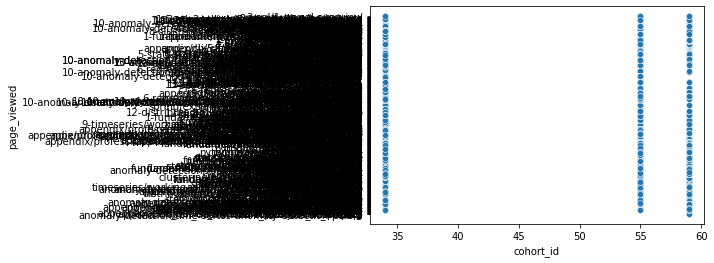

In [50]:
sns.scatterplot(x=DS_df.cohort_id, y=DS_df.page_viewed)

#### Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? <a class="anchor" id="second-bullet"></a>

#### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? <a class="anchor" id="third-bullet"></a>

#### Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? <a class="anchor" id="fourth-bullet"></a>

#### At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? <a class="anchor" id="fifth-bullet"></a>

#### What topics are grads continuing to reference after graduation and into their jobs (for each program)? <a class="anchor" id="sixth-bullet"></a>

#### Which lessons are least accessed? <a class="anchor" id="seventh-bullet"></a>